References

* https://www.freecodecamp.org/news/an-intuitive-guide-to-convolutional-neural-networks-260c2de0a050/

* https://cs231n.github.io/convolutional-networks/

* https://www.tomasbeuzen.com/deep-learning-with-pytorch/chapters/chapter5_cnns-pt1.html

## 0. Computer vision libraries in PyTorch

* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvision.models` - get pre-trained model that you can leverage on your own problem
* `torchvision.transforms` - functions for manipulating data (convert images to numbers) to be suitable with an ML model
* `torch.utils.data.Dataset` - base dataset class for PyTorch
* `torch.utils.data.DataLoader` - creates a Python iterable over a dataset

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

1.13.1+cu116
0.14.1+cu116


## 1. Getting a dataset

the dataset we will be using is FashionMNIST from torchvision.datasets

In [ ]:
# setup training data
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
image, label = train_data[0]
label

9

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
# check the shape
# color, H, W
image.shape, label

(torch.Size([1, 28, 28]), 9)

PyTorch default image format is NCHW
[Batch size, Color Channles, Hight, Width]


In [ ]:
# visualize our data

image, label = train_data[0]
print(f"Image shape:{image.shape}")

Image shape:torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

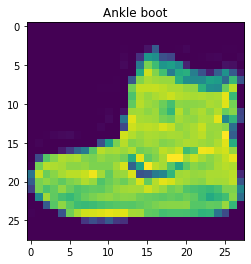

In [ ]:
plt.imshow(image.squeeze()) # remove the singular dimension
plt.title(class_names[label]) 

(-0.5, 27.5, 27.5, -0.5)

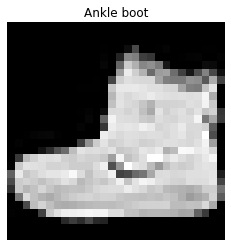

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False) # remove the axis

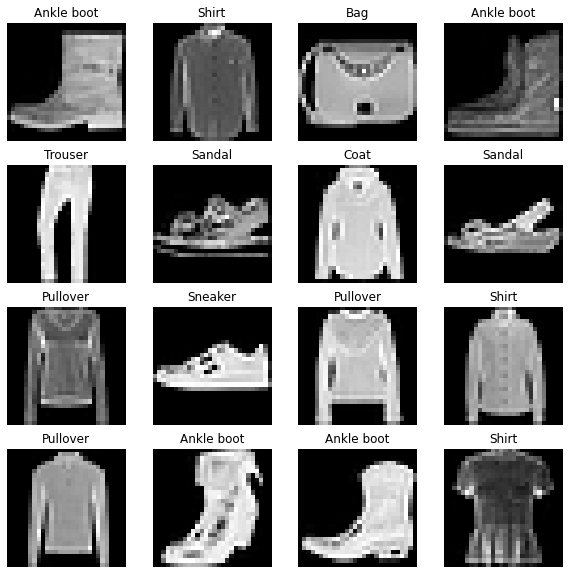

In [ ]:
# plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(10, 10))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  #print(i)
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## Prepare DataLoader

Right now our data is in the form of PyTorch Datasets.

DataLoader turns our datasets into a Python iterable.

More specifically, we want to turn our data into batches (mini-batches).

WHY???

1. It's more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60,000 images in one hit. So we break it down into 32 images at a time (batch size = 32)

2. It gives our neural network more chances to update its gradient per epoch.

In [ ]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
from torch.utils.data import DataLoader

# setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterable (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader

In [ ]:
print(f"Number of batches of size 32: {len(train_dataloader)}") # number of batches of batch size = 32

Number of batches of size 32: 1875


In [ ]:
# check out what is inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
print(train_features_batch.shape)
print(train_labels_batch.shape)
# print(train_features_batch)
print(len(train_features_batch))
print(len(train_labels_batch))

torch.Size([32, 1, 28, 28])
torch.Size([32])
32
32


image size: torch.Size([1, 28, 28])
label: 8, label size: torch.Size([])


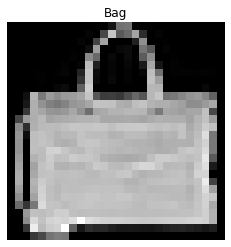

In [ ]:
# show a sample
# torch.manual_seed(42)

random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"image size: {img.shape}")
print(f"label: {label}, label size: {label.shape}")

## Model 0: Build a baseline model

When starting to build a series of ML modeling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try, and improve upon with subsequent models/experiments.

In other words: **Start Simply, and add Complexity when Necessary**...

In [ ]:
# create a flatten layer
flatten_model = nn.Flatten()

# get a single sample
x = train_features_batch[0]

# flatten the sample
output = flatten_model(x)

# print out what happened
print(f"shape before flattening: {x.shape}")
print(f"shape after flattening: {output.shape}") # 28*28 = 784

shape before flattening: torch.Size([1, 28, 28])
shape after flattening: torch.Size([1, 784])


In [ ]:
# input image -> flatten layer -> linear function layer 1 -> linear function layer 2 -> output label

class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

# setup model with inout parameters
model_0 = FashionMNISTModelV0(
    input_shape = 28*28,
    hidden_units = 10,
    output_shape = len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1, 1, 28, 28]) # [Batch_size, color_channel, H, W]
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### Loss, optimizer, evaluation metrics

* Loss function: since we are working with classification data, we will use `nn.CrossEntropyLoss()`
* Optimizer: `torch.optim.SGD()`
* Evaluation metric: we will use Accuracy

In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("File already exists!")
else:
  print("Downloading the file...")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
# import accuracy function metric
from helper_functions import accuracy_fn

# setup loss fnction, and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### Creating a function to time our experiments

Machine learning is very experimental.

Two things you will often want to track:
1. Model's performance (loss, accuracy, ...)
2. How fast it runs

Tradeoff between these two things.

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """
  Prints difference between start and end time.
  """
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
start_time = timer()
# some code ...
end_time = timer()
print_train_time(start=start_time,
                 end=end_time,
                 device="cpu")

Train time on cpu: 0.000 seconds


3.259700000057819e-05

### Creating a training loop and training model on batches of data

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. Time it all

In [ ]:
type(train_dataloader)

torch.utils.data.dataloader.DataLoader

In [ ]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed, and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set the numer of epochs - start with small numbers for faster training time
epochs = 3

# create training and testing loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------------------")

  ### training
  train_loss = 0 # we will accumulate the loss and take the range to calculate the average training loss
  # add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()

    # 1. forward pass
    y_pred = model_0(X)

    # 2. calculate the loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate the training loss
    # print("train loss", train_loss)

    # 3. optimizer zer grad
    optimizer.zero_grad()

    # 4. loss bachward
    loss.backward()

    # 5. optimizer step
    optimizer.step() # update the parameters every batches

    # print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples.")

  # divide total train loss by length of train dataloader=1875
  train_loss /= len(train_dataloader)

  ### testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. forward pass
      test_pred = model_0(X_test)

      # 2. calculate the loss
      test_loss += loss_fn(test_pred, y_test)

      # calculate the accuracy
      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1))
      
    # calculate the test loss average per batch
    test_loss /= len(test_dataloader)
    # caculate the test accuracy average per batch
    test_acc /= len(test_dataloader)

  # print out what is happening
  print(f"Training Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

# calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------------------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Training Loss: 0.5904 | Test Loss: 0.5095, Test Acc: 82.0387
Epoch: 1
-------------------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Training Loss: 0.4763 | Test Loss: 0.4799, Test Acc: 83.1969
Epoch: 2
-------------------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Training Loss: 0.4550 | Test Loss: 0.4766, Test Acc: 83.4265
Train time on cpu: 27.539 seconds


In [ ]:
len(train_dataloader.dataset)

60000

In [ ]:
len(train_dataloader)

1875

In [ ]:
str(next(model_0.parameters()).device)

'cpu'

## Make predictions and get Model 0 results

In [ ]:
torch.manual_seed(42)
def eval_model(model: nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: nn.Module,
               accuracy_fn):
  """
  Returns a dictionary containing the results of model predicting on data loader.
  """
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # make prediction
      y_pred = model(X)

      # accumulate the loss, and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
      
    # scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, #only works when model was created with class
          "model_loss": loss.item(),
          "model_acc": acc}

model_0_results = eval_model(model=model_0,
                               data_loader=test_dataloader,
                               loss_fn=loss_fn,
                               accuracy_fn=accuracy_fn)
  
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Setup device agnositc-code

In [ ]:
!nvidia-smi

Thu Jan 12 09:38:36 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
torch.cuda.is_available()

True

In [ ]:
# setup device agnostic-code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Model 1: Building a model with non-linearity

In [ ]:
# create a model with non-linear and linear layers

class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten inputs into a single vector
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
# create an instance of model_1

torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=28*28,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [ ]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
# create loss, optimzer, evaluation metrics
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # measure how wrong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(), # tried to update our model's params to reduce the loss
                            lr=0.1)

### Functioninzing the training and testing loops

Let's create a function for:
* training loop - `train_step()`
* testing loo - `test_step()`

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim,
               accuracy_fn,
               device: torch.device = device):
  """Performs a training step with model trying to learn on data_loader"""
  train_loss, train_acc = 0, 0

  # put model into training mode
  model.train()

  # add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # put data on target device
    X, y = X.to(device), y.to(device)

    # 1. forward pass (outputs the raw logits from the model)
    y_pred = model(X)

    # 2. calculate the loss and acc (per batches)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) # go from logits -> predicition labels

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. optimizer step
    optimizer.step()

  # divide total train loss and acc by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train Loss: {train_loss:.5f} || Train Accuracy: {train_acc:.2f}%\n")

In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Performs a testing step on the model"""

  test_loss, test_acc = 0, 0

  # put the model in eval mode
  model.eval()

  # turn on inference mode contect manager
  with torch.inference_mode():
    for X_test, y_test in data_loader:
      # send data to the target device
      X_test, y_test = X_test.to(device), y_test.to(device)

      # 1. forward pass (outputs raw logits)
      test_pred = model(X_test)

      # 2. calculate the loss and acc
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1)) # go from logits -> pred labels

    # adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    print(f"Test Loss: {test_loss:.5f} || Test Accuracy: {test_acc: .2f}%\n")

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# measure the time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# set epochs
epochs = 3

# create an optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epochs: {epoch}\n---------------------------------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             optimizer=optimizer,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
  
train_time_end_on_gpu = timer()

total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=str(next(model_1.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epochs: 0
---------------------------------
Train Loss: 1.09199 || Train Accuracy: 61.34%

Test Loss: 0.95636 || Test Accuracy:  65.00%

Epochs: 1
---------------------------------
Train Loss: 0.78101 || Train Accuracy: 71.93%

Test Loss: 0.72227 || Test Accuracy:  73.91%

Epochs: 2
---------------------------------
Train Loss: 0.67027 || Train Accuracy: 75.94%

Test Loss: 0.68500 || Test Accuracy:  75.02%

Train time on cuda:0: 27.154 seconds


In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
total_train_time_model_0

27.539307836999996

> **Note** Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than GPU.
>
> Why is this??
>
> 1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU.
> 2. The hardware you're using has a better CPU in terms of compute capability than the GPU

In [ ]:
# make the eval model function device agnostic 

torch.manual_seed(42)
def eval_model(model: nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: nn.Module,
               accuracy_fn,
               device):
  """
  Returns a dictionary containing the results of model predicting on data loader.
  """
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # send the data to the target device
      X, y = X.to(device), y.to(device)
      # make prediction
      y_pred = model(X)

      # accumulate the loss, and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
      
    # scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, #only works when model was created with class
          "model_loss": loss.item(),
          "model_acc": acc}

In [ ]:
model_1_results = eval_model(model=model_1,
                               data_loader=test_dataloader,
                               loss_fn=loss_fn,
                               accuracy_fn=accuracy_fn,
                             device=device)
  
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

## Model 2: Building a Convolutional Neural Network - CNN

CNN's are also known ConvNets.

CNN's are know for their capabilities to find patterns in visual data.

For more info, check this https://poloclub.github.io/cnn-explainer/

In [ ]:
# create our first convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model Architecture that replicates the TinyVGG
  """
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # there's a trick to calculate this
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier_layer(x)
    # print(x.shape)
    return x


In [ ]:
# instantiate the mode
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, # number of image color channels 
                              hidden_units=10,
                              output_shape=10).to(device) # number of class names

model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
rand_image_tensor = torch.randn(size=(1, 28, 28))

# pass image through model
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

### Know more details about `nn.Conv2d()`

In [ ]:
torch.manual_seed(42)

# create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"image batch shape: {images.shape}")
print(f"single image shape: {test_image.shape}")
print(f"test image:\n {test_image}")

image batch shape: torch.Size([32, 3, 64, 64])
single image shape: torch.Size([3, 64, 64])
test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [ ]:
# create a single conv2d layer

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=0)

In [ ]:
conv_output = conv_layer(test_image)

In [ ]:
conv_output.shape

torch.Size([10, 62, 62])

### Know more details about `nn.MaxPool2d`

In [ ]:
# create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=(2, 2))

test_image_after_maxpool = max_pool_layer(conv_output)

print(f"image shapre after max pool: {test_image_after_maxpool.shape}")

image shapre after max pool: torch.Size([10, 31, 31])


### Setup a loss function and optimizer for `model_2`

In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [ ]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight', tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
                    

### Training and testing `model_2`

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# measure time
from timeit import default_timer as timer

train_time_start_model_2 = timer()

# Train and test mode
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------------")

  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
  
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------------
Train Loss: 0.59052 || Train Accuracy: 78.54%

Test Loss: 0.39396 || Test Accuracy:  86.03%

Epoch: 1
---------------
Train Loss: 0.36503 || Train Accuracy: 86.84%

Test Loss: 0.35596 || Test Accuracy:  86.80%

Epoch: 2
---------------
Train Loss: 0.32938 || Train Accuracy: 88.07%

Test Loss: 0.32919 || Test Accuracy:  88.01%

Train time on cuda: 34.159 seconds


In [ ]:
# get model_2 results
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32919323444366455,
 'model_acc': 88.00918530351437}

## Comparing model results and training time

In [ ]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.329193,88.009185


In [ ]:
# add training time
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,27.539308
1,FashionMNISTModelV1,0.685001,75.019968,27.154491
2,FashionMNISTModelV2,0.329193,88.009185,34.158651


Text(0, 0.5, 'model')

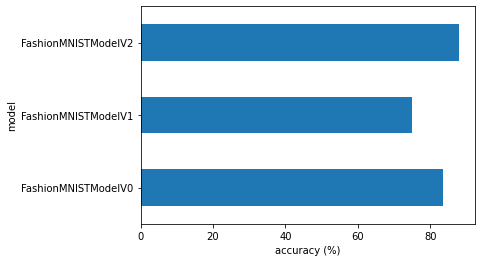

In [ ]:
# visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## Make and evaluate random prediction with best model 

In [ ]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [ ]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
import random

random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# print the first test sample shape
print(f"Test sample image shape: {test_samples[0].shape}, \n Test sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28]), 
 Test sample label: 5 (Sandal)


In [ ]:
# make prediction on model 2
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

pred_probs[:2]

tensor([[8.2200e-08, 1.0792e-09, 1.2985e-08, 6.3289e-08, 4.7033e-10, 9.9997e-01,
         7.5729e-08, 4.2424e-06, 4.7859e-06, 1.9168e-05],
        [5.0484e-02, 7.5409e-01, 1.2031e-03, 7.5922e-02, 2.7308e-02, 8.5913e-05,
         8.9615e-02, 5.1087e-04, 7.1406e-04, 6.6835e-05]])

In [ ]:
# turn the pred prob into pred labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [ ]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

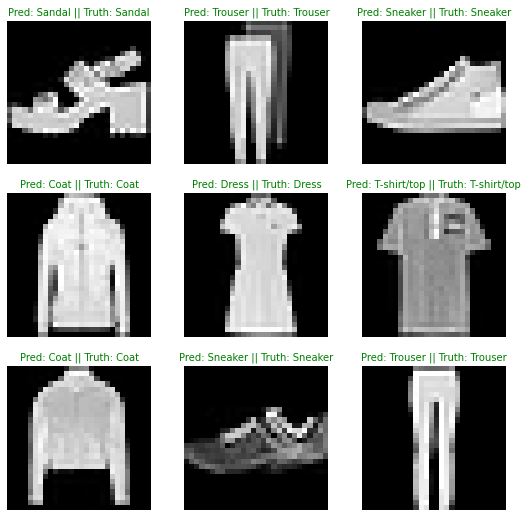

In [ ]:
# plot the predictions

plt.figure(figsize=(9, 9))

nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
  # create subplot
  plt.subplot(nrows, ncols, i+1)

  # plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  pred_label = class_names[pred_classes[i]]

  truth_label = class_names[test_labels[i]]

  title_text = f"Pred: {pred_label} || Truth: {truth_label}"

  # check the equality and change the color accordingly
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")
  plt.axis(False)

## Making a confusion matrix

There are 3 steps:

1. make predictions with our trained model on the test dataset
2. making a confusion matrix using `torchmetrics.ConfusionMatrix`
3. plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [ ]:
# 1. make prediction on the entire test dataset
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="make prediction"):
    # send data to the target device
    X, y = X.to(device), y.to(device)
    # do the forward pass
    y_logits = model_2(X)
    # turn logits -> pred probs -> pred labels
    y_pred = torch.softmax(y_logits.squeeze(), dim=1).argmax(dim=1)
    # put prediction on cpu for evaulation
    y_preds.append(y_pred.cpu())

# concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

make prediction:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 5])

In [ ]:
len(y_pred_tensor)

10000

In [ ]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics
    !pip install mlxtend --upgrade --no-deps # https://rasbt.github.io/mlxtend/installation/
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.4/512.4 KB 10.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.1 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0
mlxtend version: 0.21.0


In [ ]:
test_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

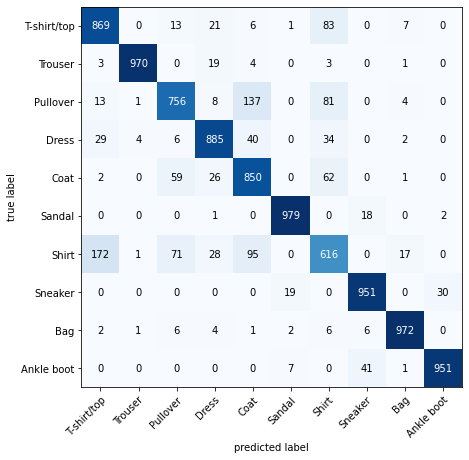

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets) # compare pred to target

# 3. plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10,7)
)

In [ ]:
confmat_tensor

tensor([[869,   0,  13,  21,   6,   1,  83,   0,   7,   0],
        [  3, 970,   0,  19,   4,   0,   3,   0,   1,   0],
        [ 13,   1, 756,   8, 137,   0,  81,   0,   4,   0],
        [ 29,   4,   6, 885,  40,   0,  34,   0,   2,   0],
        [  2,   0,  59,  26, 850,   0,  62,   0,   1,   0],
        [  0,   0,   0,   1,   0, 979,   0,  18,   0,   2],
        [172,   1,  71,  28,  95,   0, 616,   0,  17,   0],
        [  0,   0,   0,   0,   0,  19,   0, 951,   0,  30],
        [  2,   1,   6,   4,   1,   2,   6,   6, 972,   0],
        [  0,   0,   0,   0,   0,   7,   0,  41,   1, 951]])

## Save and load best performing model

In [ ]:
from pathlib import Path

# create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# create model save
MODEL_NAME = "fashion_mnis_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save the model state dict
print(f"saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

saving model to models/fashion_mnis_model.pth


In [ ]:
# create a new model instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# load in the save state_dict() 
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# evaluate the loaded model

loaded_model_2_results = eval_model(model=loaded_model_2,
                                    data_loader=test_dataloader,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn,
                                    device=device)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32919323444366455,
 'model_acc': 88.00918530351437}

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32919323444366455,
 'model_acc': 88.00918530351437}

In [ ]:
# check if the model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]))

tensor(True)